# Neural Network - Classifier

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

#For visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt  
sns.set(color_codes=True)        #adds color background (have to kill the kernel to see the changes of color)
%matplotlib inline 

#For scientific computations
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import necessary modules
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.optimizers import SGD, Adam
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization, Dropout
from keras.utils import to_categorical

## Import Data

In [ ]:
  from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
project_path = 'drive/My Drive/Projects/'  #change dir to your project folder
dataset_file = project_path + 'Part- 1,2&3 - Signal.csv'

## Data Visualization and Analysis

In [ ]:
data = pd.read_csv(dataset_file)
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
print('Shape of data file is: {}'.format(data.shape))

Shape of data file is: (1599, 12)


In [ ]:
data.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

We can observe that all the columns are of float data type except for signal strength/target variable which is in int format.


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


From the above table we can observe that there are no missing values in any of the features. Mean values of different parameters varies from  0.27 to 46.46 and std varies from 0.001 to 32.89. Parameter 7 seems to have high mean and std. Our target variable Signal Strength has mean 5.6 and std of 0.8. Minimum and Maximum values of Signal Strength are 3 and 8 respectively.

In [ ]:
# Crosscheck null values
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

Since there are no missing values, there no need for missing value treatment.

In [ ]:
#Let us see count of different output values
target_counts = data.groupby('Signal_Strength').size()
print(target_counts);

Signal_Strength
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


We can observe that most of the entries constitutes to signal strength of 5 and 6 which are above 600 while the extreme values of signal strength (3 and 8) have entries below 20.

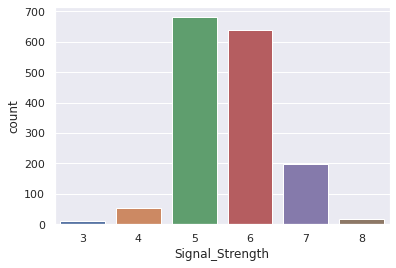

In [ ]:
#Plot of the target variable
sns.countplot(data['Signal_Strength']);

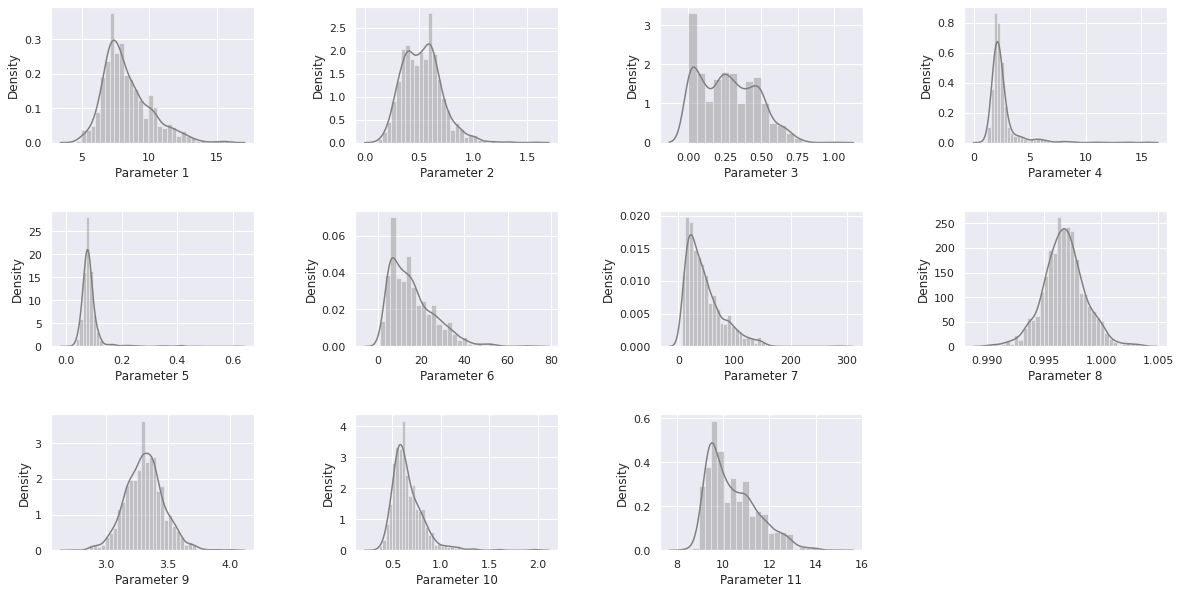

In [ ]:
# Univariate Analysis of all the Parameter columns
plt.figure(figsize= (20,10));

plt.subplot(3,4,1);
# plt.title('Parameter 1')
sns.distplot(data['Parameter 1'],color='grey');

plt.subplot(3,4,2);
# plt.title('Parameter 2')
sns.distplot(data['Parameter 2'],color='grey');

plt.subplot(3,4,3);
# plt.title('Parameter 3')
sns.distplot(data['Parameter 3'],color='grey');

plt.subplot(3,4,4);
# plt.title('Parameter 4')
sns.distplot(data['Parameter 4'],color='grey');

plt.subplot(3,4,5);
# plt.title('Parameter 5')
sns.distplot(data['Parameter 5'],color='grey');

plt.subplot(3,4,6);
# plt.title('Parameter 6')
sns.distplot(data['Parameter 6'],color='grey');

plt.subplot(3,4,7);
# plt.title('Parameter 7')
sns.distplot(data['Parameter 7'],color='grey');

plt.subplot(3,4,8);
# plt.title('Parameter 8')
sns.distplot(data['Parameter 8'],color='grey');

plt.subplot(3,4,9);
# plt.title('Parameter 9')
sns.distplot(data['Parameter 9'],color='grey');

plt.subplot(3,4,10);
# plt.title('Parameter 10')
sns.distplot(data['Parameter 10'],color='grey');

plt.subplot(3,4,11);
# plt.title('Parameter 11')
sns.distplot(data['Parameter 11'],color='grey');

plt.subplots_adjust(hspace=0.5, wspace=0.5)

From the above plots we can observe that Parameter 8 and Parameter 9 are close to normal distribution. Parameter 3 is non-uniform. Otherwise most of the other Parameters are left skewed.

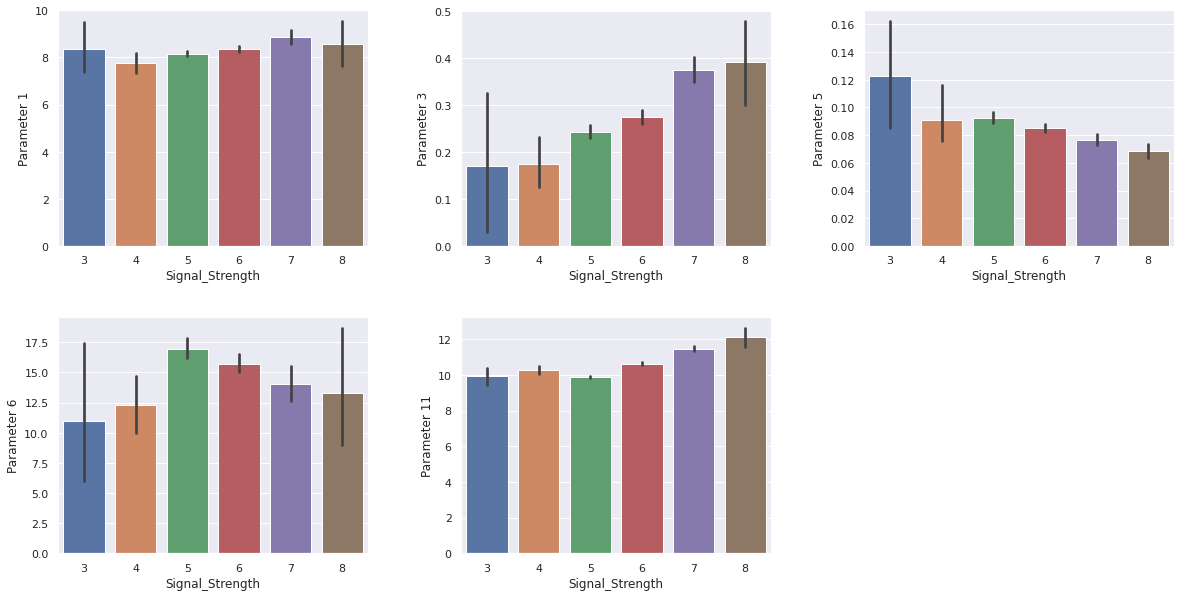

In [ ]:
# Bivariate Analysis of few Parameter columns
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(data['Signal_Strength'], data['Parameter 1']);

plt.subplot(2,3,2)
sns.barplot(data['Signal_Strength'], data['Parameter 3']);

plt.subplot(2,3,3)
sns.barplot(data['Signal_Strength'], data['Parameter 5']);

plt.subplot(2,3,4)
sns.barplot(data['Signal_Strength'], data['Parameter 6']);

plt.subplot(2,3,5)
sns.barplot(data['Signal_Strength'], data['Parameter 11']);

plt.subplots_adjust(hspace=0.3, wspace=0.3)

From the above plot we can observe that  outliers are found in extreme values of Signal Strength. Parameters 3,5 and 6 seems to have more variations compared to other parameters.

Removing outliers using z-score.

In [ ]:
z = np.abs(stats.zscore(data))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [ ]:
# Let's cross check the z-score value at the above locations
print(z[13][9])

5.32210116796055


In [ ]:
data2 = data[(z < 3).all(axis=1)]
print('Shape of dataset before removing outliers: {}'.format(data.shape))
print('Shape of dataset after removing outliers:  {}'.format(data2.shape))

Shape of dataset before removing outliers: (1599, 12)
Shape of dataset after removing outliers:  (1451, 12)


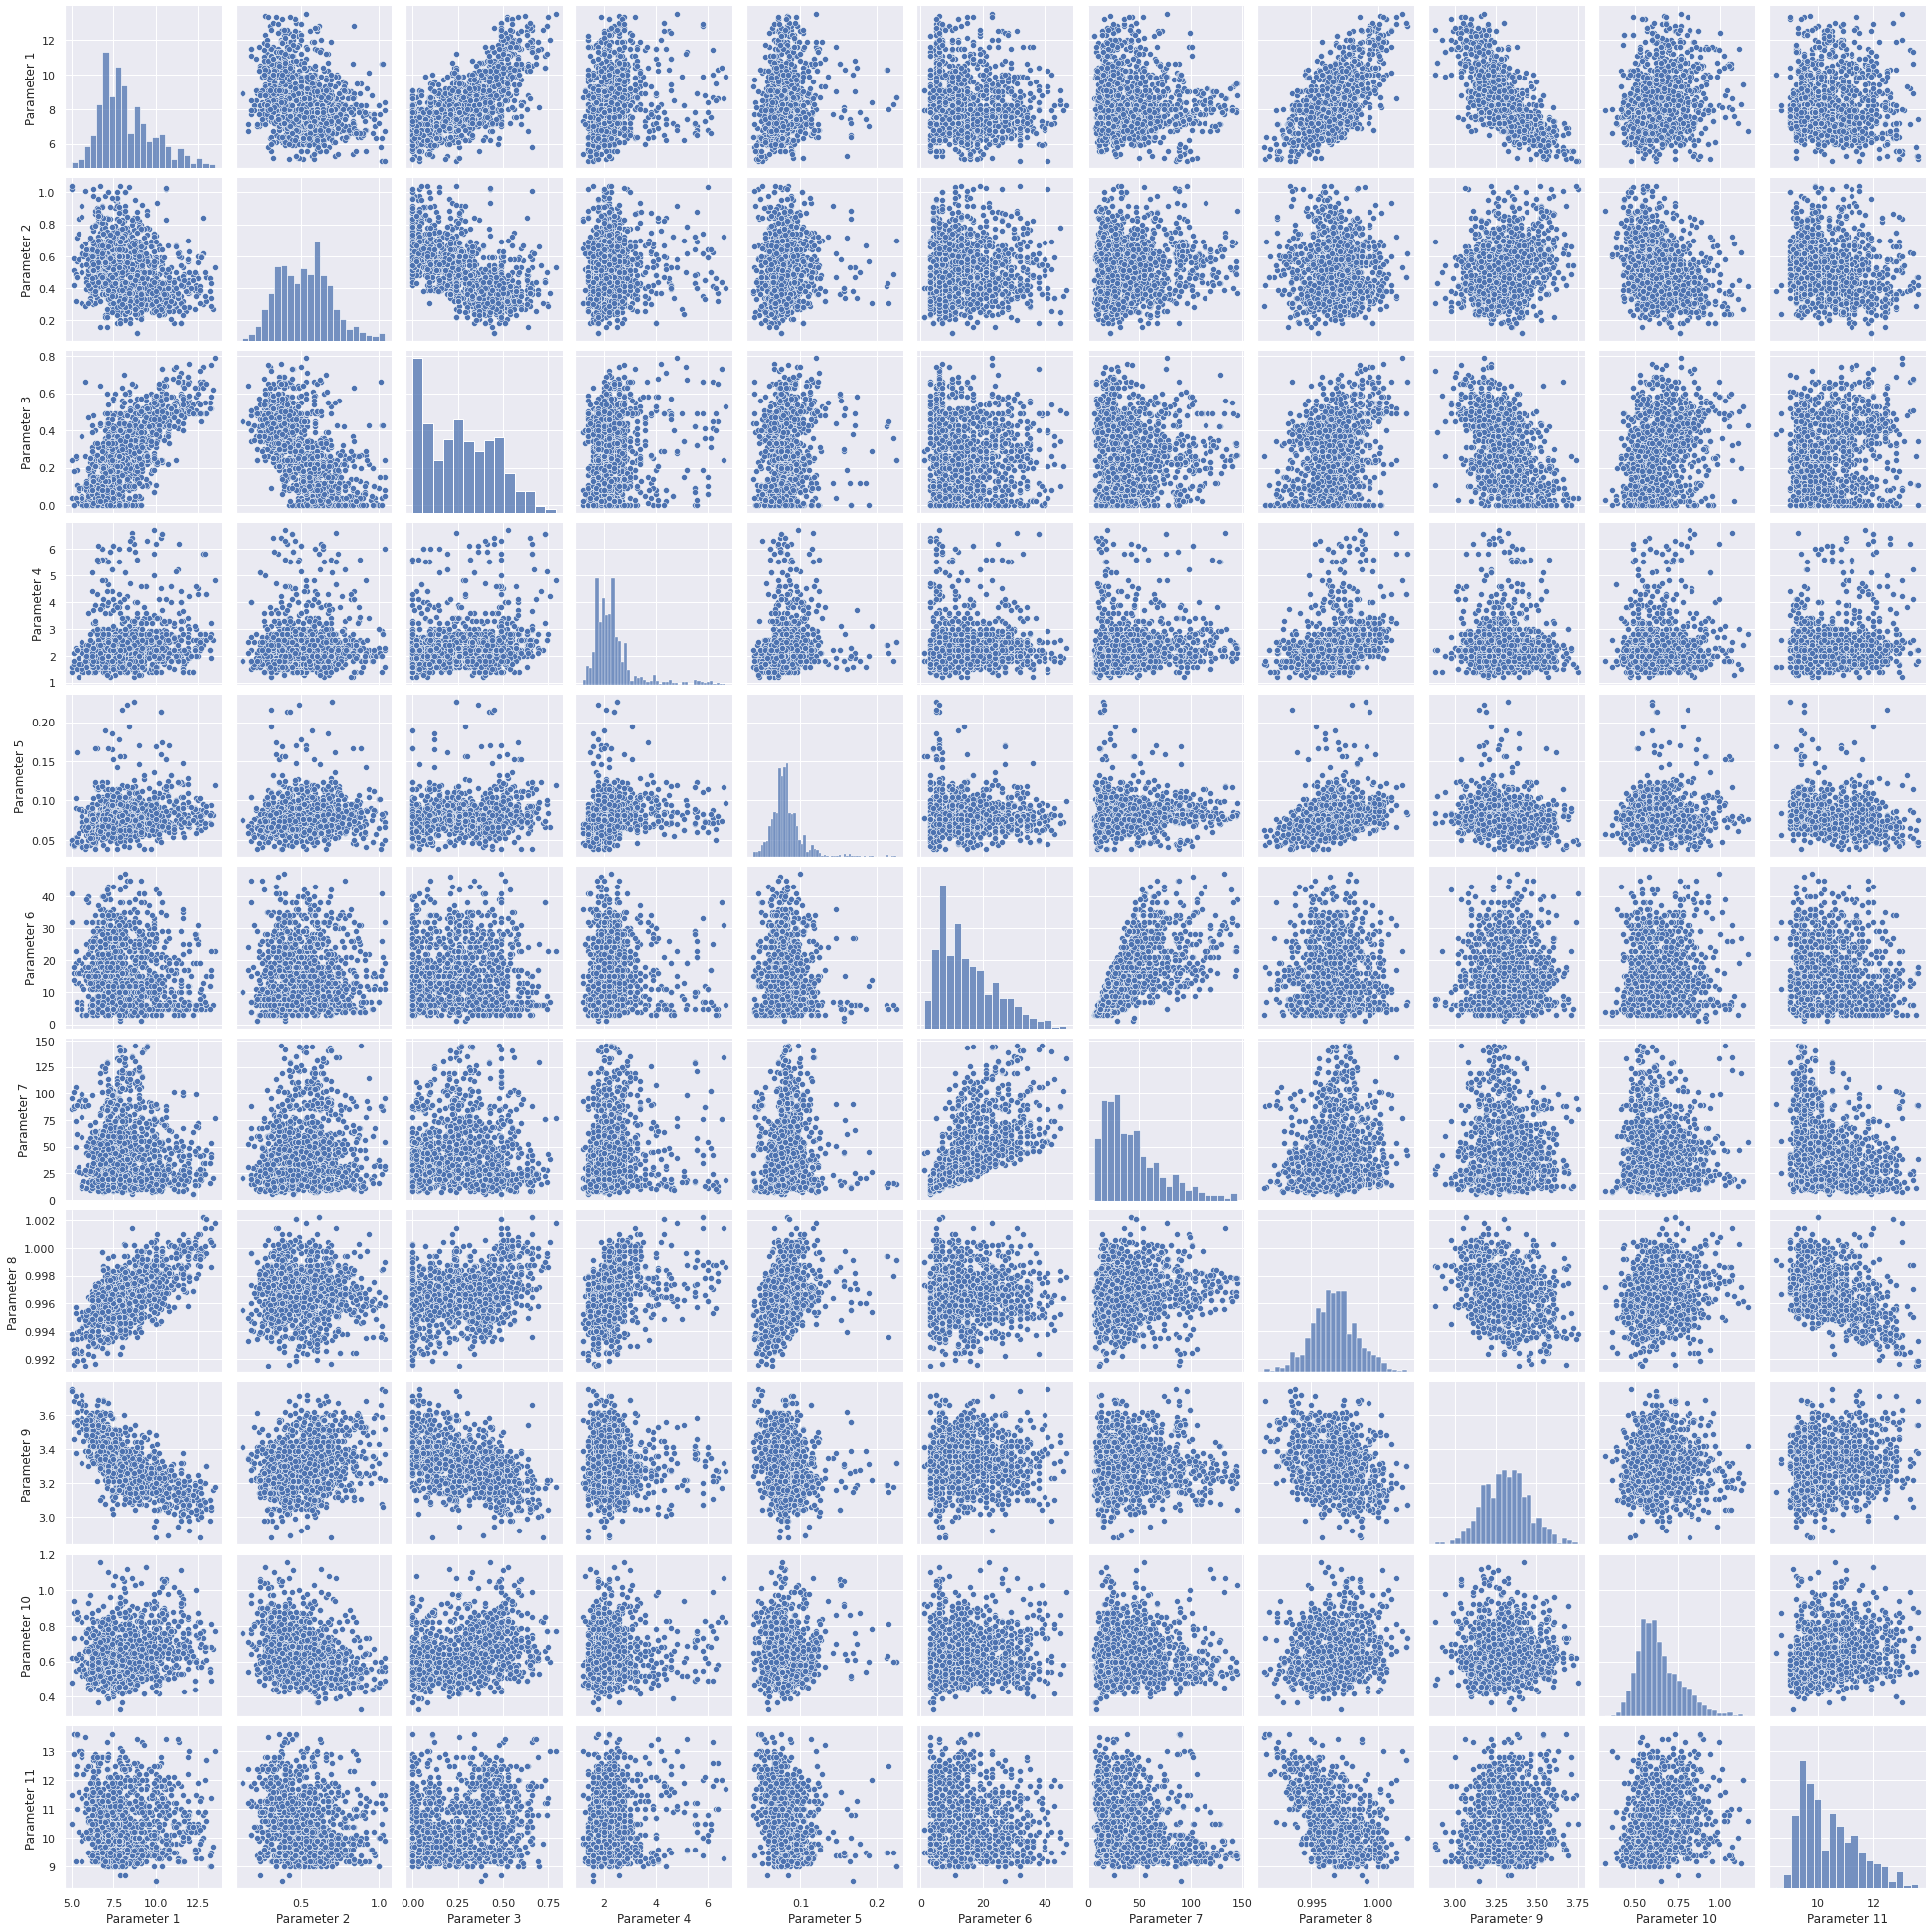

In [ ]:
#Multivariate Analysis

indata = data2.drop(['Signal_Strength'], axis=1)
tdata  = data2.loc[:,'Signal_Strength']

sns.pairplot(indata);

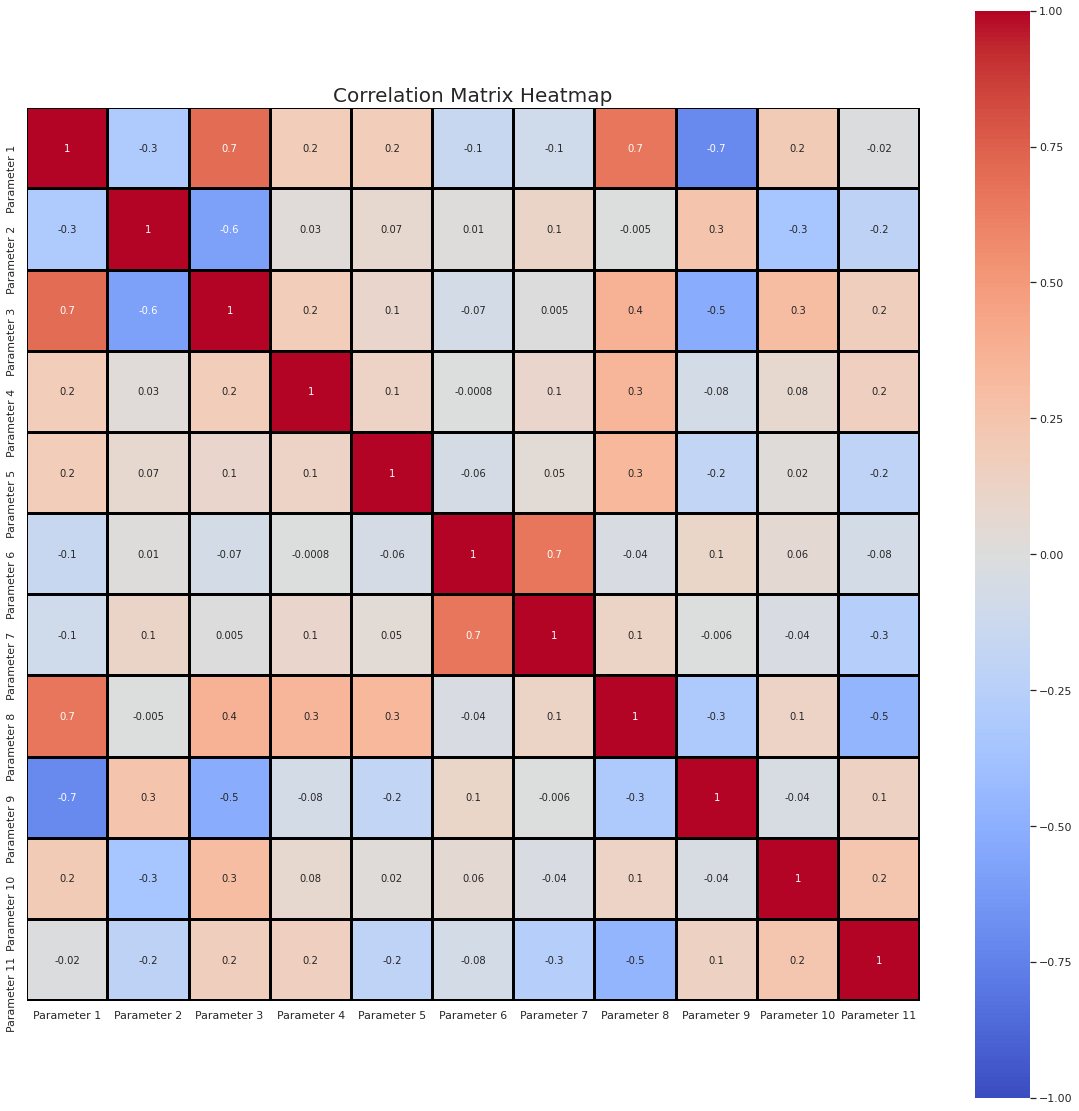

In [ ]:
# Correlation matrix heatmap

plt.rcParams['figure.figsize'] = (20, 20)
plt.title('Correlation Matrix Heatmap', fontsize = 20)
sns.heatmap(indata.corr(), cmap = "coolwarm", annot=True, fmt='.1g', vmin=-1, 
            vmax=1, center= 0, linewidths=2, linecolor='black', square=True);

From the above pairplot and correlation matrix we can see that Parameter 1 is slightly correlated with Parameter 8 and Parameter 9. Other parameters are not much impacted by correlation. Thus, chances of multicollinearity is less.

## Model Building

In [ ]:
# Creating train and test datasets
X2 = indata.values
y2 = tdata.values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, test_size=0.30, random_state=40)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

# converting y data into categorical (one-hot encoding)
y_train1 = to_categorical(y_train1)
y_test1 = to_categorical(y_test1)

# print(X_train1.shape); print(X_test1.shape); print(y_train1.shape); print(y_test1.shape)

In [ ]:
# Building the NN regressor model
model2 = Sequential()

# Normalize input data
model2.add(tensorflow.keras.layers.BatchNormalization(input_shape=(11,)))

# Hidden layers
model2.add(Dense(512, activation='relu', kernel_initializer= 'he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2)) 
model2.add(Dense(200, activation='relu', kernel_initializer= 'he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2)) 
model2.add(Dense(100, activation='relu', kernel_initializer= 'he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2)) 
# model2.add(Dense(50, activation= "relu", kernel_initializer= 'he_normal'))
# model2.add(BatchNormalization())
# model2.add(Dropout(0.2)) 

# Output node
model2.add(Dense(9, activation='softmax')) #, kernel_initializer='glorot_uniform'))

- We use **Batch normalization** for standardizing and normalizing the inputs. This technique mitigates the effect of unstable gradients within deep neural networks. BN introduces an additional layer to the neural network that performs operations on the inputs from the previous layer. The operation standardizes and normalizes the input values.
- BN improves training time, shortens the convergence, reduces vanishing gradients.
- The next line of code represents the first layer which specifies the activation function and the number of input dimensions, which in our case is 11 predictors. 
- We repeat the same process in the next lines of code for the hidden layers, this time without the input_dim parameter. The last line of code creates the output layer with one node that is supposed to output the Signal Strength/Quality.
- The activation function used in the hidden layers is a **rectified linear unit, or ReLU.** It is the most widely used activation function because of its advantages of being nonlinear, as well as the ability to not activate all the neurons at the same time. In simple terms, this means that at a time, only a few neurons are activated, making the network sparse and very efficient.
- In **He initialization**  the weights are initialized keeping in mind the size of the previous layer which helps in attaining a global minimum of the cost function faster and more efficiently. The weights are still random but differ in range depending on the size of the previous layer of neurons. This provides a controlled initialization hence the faster and more efficient gradient descent. Also He initialization is the best initializer to be used when activation function is ReLU.
- The **Softmax** function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution. That is, Softmax can be used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
- Generally we use **Xavier initialization** for  activation functions like tanh, sigmoid, softmax which is default.

In [ ]:
# Print model Summary
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               102600    
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0

The “Param #” column shows you the number of parameters that are trained for each layer. The total number of parameters is shown at the end, which is equal to the number of trainable and non-trainable parameters. In this model, 131,399 params are trainable and 1646 non-trainable params.

In [ ]:
# Compile and fit model
# opt = SGD(lr=0.01, momentum=0.9)
opt = Adam(lr=0.01)

model2.compile(loss= 'categorical_crossentropy' , optimizer=opt, metrics='accuracy')
result2 = model2.fit(X_train1, y_train1, batch_size=25, epochs=50, validation_split=0.2);

Epoch 1/50
33/33 [==============================] - 2s 23ms/step - loss: 2.1342 - accuracy: 0.3933 - val_loss: 5.2331 - val_accuracy: 0.2217
Epoch 2/50
33/33 [==============================] - 0s 7ms/step - loss: 0.9963 - accuracy: 0.5901 - val_loss: 2.2826 - val_accuracy: 0.3793
Epoch 3/50
33/33 [==============================] - 0s 7ms/step - loss: 0.8910 - accuracy: 0.5947 - val_loss: 1.4218 - val_accuracy: 0.5369
Epoch 4/50
33/33 [==============================] - 0s 6ms/step - loss: 0.8329 - accuracy: 0.6157 - val_loss: 1.2131 - val_accuracy: 0.5369
Epoch 5/50
33/33 [==============================] - 0s 7ms/step - loss: 0.8612 - accuracy: 0.6410 - val_loss: 1.0346 - val_accuracy: 0.5468
Epoch 6/50
33/33 [==============================] - 0s 7ms/step - loss: 0.8582 - accuracy: 0.6134 - val_loss: 1.0754 - val_accuracy: 0.5764
Epoch 7/50
33/33 [==============================] - 0s 7ms/step - loss: 0.8293 - accuracy: 0.6368 - val_loss: 1.1260 - val_accuracy: 0.5616
Epoch 8/50
33/33 [=

- Cross-entropy is the default loss function to use for multi-class classification problems. Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for all classes in the problem. The score is minimized and a perfect cross-entropy value is 0.
- Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. It combines the advantages of two SGD extensions — Root Mean Square Propagation (RMSProp) and Adaptive Gradient Algorithm (AdaGrad) — and computes individual adaptive learning rates for different parameters.

In [ ]:
score = model2.evaluate(X_train1, y_train1, verbose=0)
print(score)

score_t = model2.evaluate(X_test1, y_test1, verbose=0)
print( score_t)

[0.5726929903030396, 0.7990148067474365]
[1.247121810913086, 0.6192660331726074]


Thus, accuracy for our model is 80% with 0.57 cross entropy loss for train dataset and 62% with 1.24 cross entropy loss for test dataset even after using changing hyperparameter values and tuning.

## Pickle the model

In [ ]:
# serialize model to JSON
model_json = model2.to_json()
with open("NN classifier.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model2.save_weights("NN classifier.h5")

print("Saved model to disk")

Saved model to disk


In [ ]:
# Or we can use .save and save in HDF5 format

model2.save('NN Classifier model.h5')

In [ ]:
  # from keras.models import load_model
# model2 = load_model('NN Calssifier.h5')

Thus model is saved for future use.